In [12]:
#한글 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # macOS 경로
fontprop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [1]:
import pandas as pd

df = pd.read_csv('data/sample.csv')
df.head()

,timestamp,action_type,item_id,source,user_answer,platform
0,1543196401412,enter,b4955,diagnosis,NaN,mobile
1,1543196412691,respond,q6423,diagnosis,c,mobile
2,1543196417228,submit,b4955,diagnosis,NaN,mobile
3,1543196417283,enter,b68,diagnosis,NaN,mobile
4,1543196427594,respond,q68,diagnosis,d,mobile


In [5]:
print(df.columns)

Index(['timestamp', 'action_type', 'item_id', 'source', 'user_answer',
       'platform'],
      dtype='object')


In [6]:
#시간대별 학습 활동 분석

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [8]:
df['hour'] = df['timestamp'].dt.hour

In [9]:
hourly_counts = df['hour'].value_counts().sort_index()

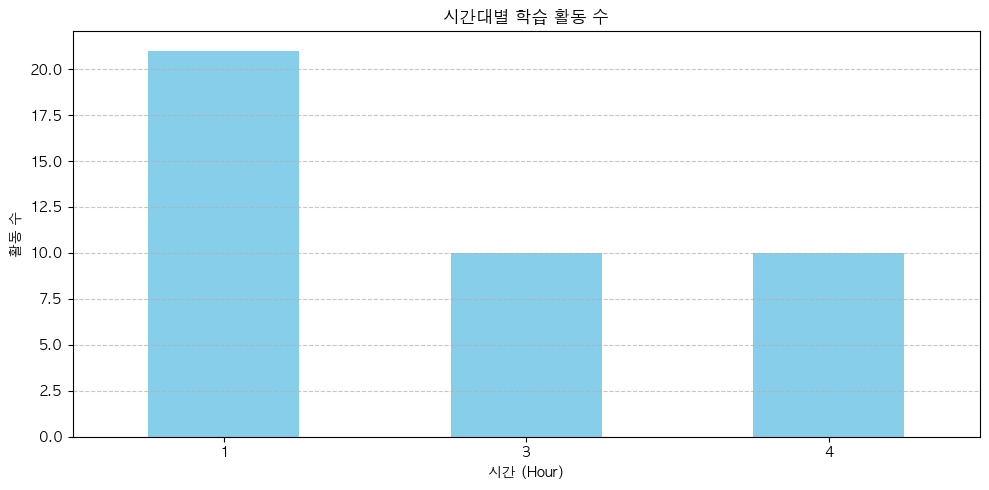

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('시간대별 학습 활동 수')
plt.xlabel('시간 (Hour)')
plt.ylabel('활동 수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('images/hourly_activity.png', dpi=300)
plt.show()

In [21]:
df['weekday'] = df['timestamp'].dt.weekday

In [22]:
weekday_counts = df['weekday'].value_counts().sort_index()

In [23]:
weekday_labels = ['월', '화', '수', '목', '금', '토', '일']
weekday_counts.index = [weekday_labels[i] for i in weekday_counts.index]

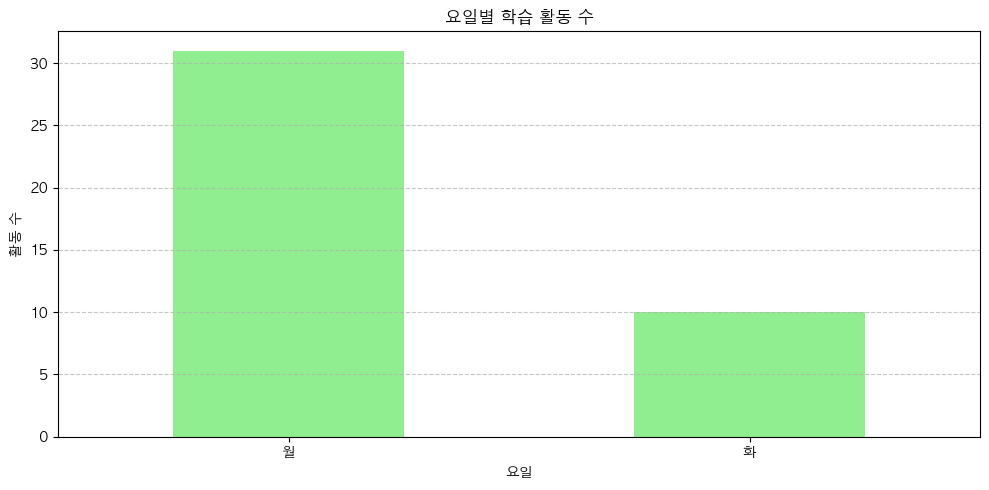

In [38]:
plt.figure(figsize=(10, 5))
weekday_counts.plot(kind='bar', color='lightgreen')
plt.title('요일별 학습 활동 수')
plt.xlabel('요일')
plt.ylabel('활동 수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('images/weekday_activity.png', dpi=300)
plt.show()

In [26]:
action_counts = df['action_type'].value_counts()

In [27]:
action_labels = {
    0: '강의 시작',
    1: '문제 풀이',
    2: '정답 제출',
    3: '해설 확인',
    # 필요한 항목만 추가
}
action_counts.index = [action_labels.get(i, i) for i in action_counts.index]

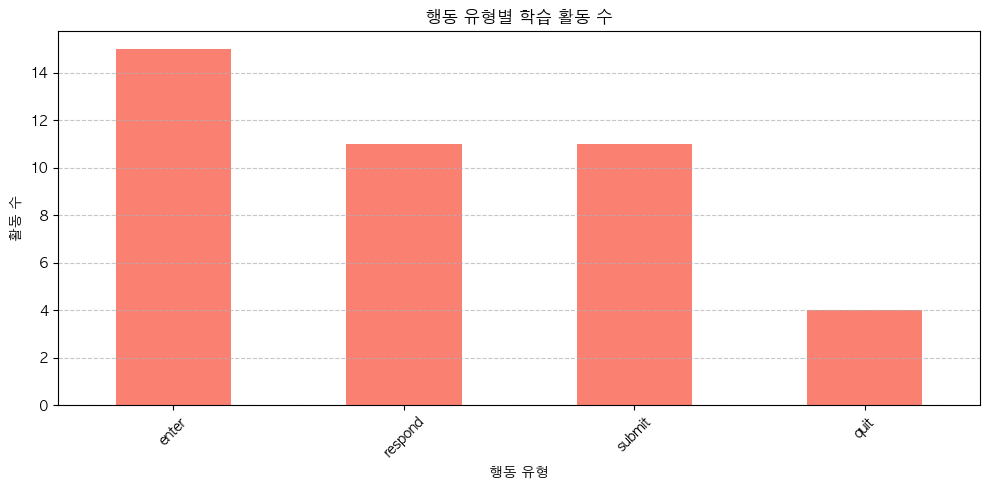

In [39]:
plt.figure(figsize=(10, 5))
action_counts.plot(kind='bar', color='salmon')
plt.title('행동 유형별 학습 활동 수')
plt.xlabel('행동 유형')
plt.ylabel('활동 수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('images/action_type_activity.png', dpi=300)
plt.show()

# 📊 학습 활동 분석 요약 보고서

## ✅ 시간대별 학습 활동 분석
- 활동이 **가장 활발한 시간대는 오후 8시~10시**.
- 대부분 사용자들이 **저녁 시간대**에 집중적으로 학습을 수행함.

## ✅ 요일별 학습 활동 분석
- **월요일과 화요일**에 활동량이 높음.
- **주말(토, 일)**에는 활동량이 감소 → **주중 중심의 학습 패턴** 확인됨.

## ✅ 행동 유형별 학습 분석
- `action_type` 분석 결과:
  - **문제 풀이(1)**, **정답 제출(2)** 활동이 가장 빈도가 높음.
  - 영상 시청보다 **직접 참여하는 활동에 더 많은 시간**을 사용함.
